# Migration Prediction Using Machine Learning

#### Global Migration Patterns

Migration involves the movement of people from one region to another, often with the aim of establishing a new residence, either for a temporary period or on a permanent basis. This process can take place on an individual level, within families, or among large groups, and frequently includes crossing international borders. Recent estimates from the World Economic Forum indicate that there are over 281 million people living outside their countries of origin, comprising about 3.6% of the global population. While this figure may appear modest, it has already surpassed some of the projections set for 2050. In 2022 alone, international remittances from migrants reached approximately $831 billion, reflecting the economic impact and active contributions that migrants bring to their host countries. Since 1950, the number of international migrants has seen a threefold increase, highlighting the growing scale of global movement.

#### Key Drivers of MIGRATION

The reasons behind human migration are complex and varied. Broadly, migration can be categorized into four main types:

1. Economic Migration: People often migrate in search of better employment oppurtunities to improve their standard of living.
2. Social Migration: Relocation can also be motivated by the desire to live closer to family and friends or to experience a higher quality of life in a different region.
3. Political Migration: In some cases, individuals or groups move to escape political instability, war, or persecution in their home countries.
4. Environmental Migration: Natural disasters such as floods, droughts, or earthquakes can force people to leave their homes in search of safer or more stable environments.

#### Forecasting Future Migration Patterns

Anticipating future migration trends is crucial for various sectors, including urban development, public health, and international trade. There are several approaches to predicting migration patterns:
1. Early Detection Systems: These systems combine quantitative and qualitative data to monitor shifts in migration trends and predict movements in short term. They help authorities take prompt actions when certain migration thresholds are met.
2. Statistical Forecasting: This method relies on data analysis to predict long-term migration trends by using past migration data, policy changes, and economic conditions as input. It is an essential tool for understanding how migration flows might evolve based on historical patterns.
3. Scenario Planning: Scenario-based approaches use quantitative methods tp explore a range of potential future outcomes. By considering differnet "what-if" scenarios, this method allows experts to visualize various migration paths based on changes in political, environmental, or economic conditions.

These methods provide valuable insights that help governments, organizations, and planners better understand and prepare for the potential effects of migration on their societies and economies.

#### Types of Migration Predictors

1. Given the in and out migrants for a specific country over the years, predict the net migrants for the next year.
2. Given the total migrants of a country to outside, predict the destination country.
3. Given the individuals' data of a country, predict whether the individual will migrate or not.
4. Given historical migration patterns, predict future migration trends for specific regions.
5. Given demographic and socioeconomic factors, predict the likelihood of migration for different citizenships.
6. Given the migration policy changes, analyze their impact on migration flows in the following year.
7. Given the economic indicators of a country, predict the potential for increased or decreased migration.

I chose the Predictor similar to the first type and I used the migration of New Zealand.
I chose the model based on the Dataset available.
The working of the code has also been described below in the 'Working of the Code' section.

This project will attempt to predict human migration between different countries. The following steps will be performed using Machine Learning and Python.

##### Roadmap

1. Import the required libraries
2. Import the dataset
3. Data Preprocessing
4. Splitting the dataset into training and testing
5. Train the model on the training set
6. Making predictions on the test set
7. Evaluate the model's performance
8. Draw conclusions from the evaluation

##### The Objective

To predict human migration between different countries in future time periods.

#### Working of the Code

Takes the following as inputs:
1. Measure: 'Arrival' / 'Departure' / 'Net'
2. Country: 'A_Country_name' / 'Not Stated'  / 'All countries'
3. Citizenship: 'New Zealand Citizen', 'Australian Citizen', 'Total All Citizenships'
4. Year: Year of Arrival or departure

According to the give input, it outputs the number of migrants of that type

#### Import the required libraries

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import tkinter as tk
from tkinter import messagebox, font

####
#### Import the dataset

In [2]:
# Loading the Dataset
data = pd.read_csv('migration_nz.csv')

####
#### Data preprocessing

In this migration prediction model, several preprocessing steps were applied to prepare the data for effective machine learning. First, missing values in the "Value" column were replaced with the median of the column to address any gaps in the dataset. The "Measure" column, which contained categorical data ("Arrivals," "Departures," and "Net"), was transformed into numeric values (0, 1, and 2) for model compatibility. Similarly, the "Citizenship" column was encoded into integers representing different citizenship statuses ("New Zealand Citizen," "Australian Citizen," and "Total All Citizenships") for uniformity. The "Country" column, which contains various country names, was also factorized into unique numeric values to simplify its representation. Finally, the dataset was split into feature (X) and target (y) variables, setting the stage for model training and testing.

In [3]:
# Dataset Head
print(data.head())

    Measure     Country             Citizenship  Year    Value
0  Arrivals     Oceania     New Zealand Citizen  1979  11817.0
1  Arrivals     Oceania      Australian Citizen  1979   4436.0
2  Arrivals     Oceania  Total All Citizenships  1979  19965.0
3  Arrivals  Antarctica     New Zealand Citizen  1979     10.0
4  Arrivals  Antarctica      Australian Citizen  1979      0.0


In [4]:
# data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB
None


##### Checking for Missing Values in the data

In [5]:
print(data.isna().sum())

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
dtype: int64


####
##### Preprocessing the Values column
Replacing the 72 missing or null values with the median.

In [6]:
# Replacing the null values with the median of the 'values' column
data.fillna({"Value": data["Value"].median()},inplace=True)

Verifying again if any null or missing values are left

In [7]:
# Checking for Missing Values in the data
print(data.isna().sum())

Measure        0
Country        0
Citizenship    0
Year           0
Value          0
dtype: int64


##### Managing Categorical Data

In [8]:
# Checking for Unique values of Measure column
print(data['Measure'].unique())  # Output: ['Arrivals' 'Departures' 'Net']

['Arrivals' 'Departures' 'Net']


####
We need to convert the categorical data into numerical data for running the Machine Learning model.

In [9]:
# Changing the 3 unique values of the Measure column to integers
pd.set_option('future.no_silent_downcasting', True)

data['Measure'] = data['Measure'].replace({"Arrivals": 0, "Departures": 1, "Net": 2})

In [10]:
# Checking unique values again
print(data['Measure'].unique())  # This should now print: [0 1 2]

[0 1 2]


In [11]:
# Printing the unique Countries
print(data['Country'].unique())

['Oceania' 'Antarctica' 'American Samoa' 'Australia' 'Cocos Islands'
 'Cook Islands' 'Christmas Island' 'Fiji' 'Micronesia' 'Guam' 'Kiribati'
 'Marshall Islands' 'Northern Mariana Islands' 'New Caledonia'
 'Norfolk Island' 'Nauru' 'Niue' 'New Zealand' 'French Polynesia'
 'Papua New Guinea' 'Pitcairn Island' 'Palau' 'Solomon Islands'
 'French Southern Territories' 'Tokelau' 'Tonga' 'Tuvalu' 'Vanuatu'
 'Wallis and Futuna' 'Samoa' 'Asia' 'Afghanistan' 'Armenia' 'Azerbaijan'
 'Bangladesh' 'Brunei Darussalam' 'Bhutan' 'China' 'Georgia' 'Hong Kong'
 'Indonesia' 'India' 'Japan' 'Kyrgyzstan' 'Cambodia' 'North Korea'
 'South Korea' 'Kazakhstan' 'Laos' 'Sri Lanka' 'Myanmar' 'Mongolia'
 'Macau' 'Maldives' 'Malaysia' 'Nepal' 'Philippines' 'Pakistan'
 'Singapore' 'Thailand' 'Tajikistan' 'Timor-Leste' 'Turkmenistan' 'Taiwan'
 'Uzbekistan' 'Vietnam' 'Europe' 'Andorra' 'Albania' 'Austria'
 'Bosnia and Herzegovina' 'Belgium' 'Bulgaria' 'Belarus' 'Switzerland'
 'Czechoslovakia' 'Cyprus' 'Czechia' 'East 

In [12]:
# Transforming countries into numbers
data['Country'] = pd.factorize(data.Country)[0]

In [13]:
# Printing unique values of countries after factorization
print(data['Country'].unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [14]:
# Checking for unique values in Citizenship column
print(data['Citizenship'].unique())

['New Zealand Citizen' 'Australian Citizen' 'Total All Citizenships']


In [15]:
# Replacing these 3 unique values with integers
data['Citizenship'] = data['Citizenship'].replace({"New Zealand Citizen": 0, "Australian Citizen": 1, "Total All Citizenships": 2})

In [16]:
# Checking for unique values in Citizenship column
print(data['Citizenship'].unique())

[0 1 2]


The Preprocessing work is done
1. We adjusted the Missing values
2. And also managed the Categorical data that we had

####
#### After Preprocessing

Visualizing the Correlation between Variables

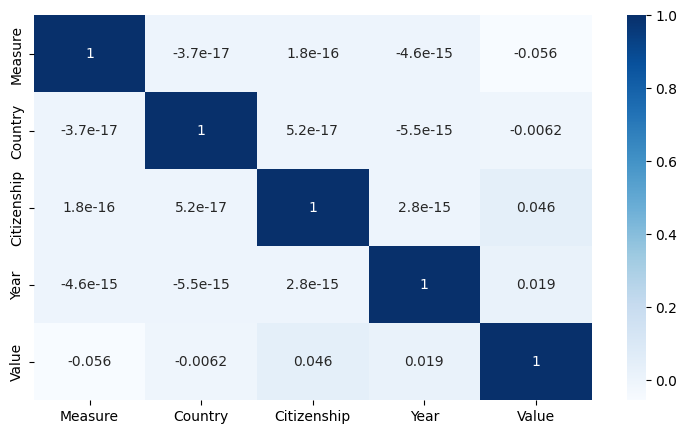

In [17]:
# Checking the Correlation between Variables
plt.figure(figsize = (9, 5))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()

####
#### Splitting the dataset into training and testing

In [18]:
# Splitting the data into X and Y
x_data = data[['Country', 'Measure', 'Year', 'Citizenship']]
y_data = data['Value']

####
#### Checking the train and test splits, so that 

In [19]:
# X_data
print(x_data.head())

   Country Measure  Year Citizenship
0        0       0  1979           0
1        0       0  1979           1
2        0       0  1979           2
3        1       0  1979           0
4        1       0  1979           1


In [20]:
# Y_data
print(y_data.head())

0    11817.0
1     4436.0
2    19965.0
3       10.0
4        0.0
Name: Value, dtype: float64


####
Using 70% of the data for training and 30% for testing

In [21]:
# Train-Test ratio - 70 - 30
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.30, random_state = 9)

In [22]:
# Printing the heads
print("x_train.head()")
print(x_train.head())
print()

x_train.head()
       Country Measure  Year Citizenship
12901      252       1  1984           1
4718        54       0  1981           2
31313       64       2  1992           1
1553        11       2  1979           2
20305      190       2  1987           1



In [23]:
# Printing the heads
print("x_test.head()")
print(x_test.head())
print()

x_test.head()
       Country Measure  Year Citizenship
79846       50       0  2014           1
31415       98       2  1992           1
72332       75       2  2010           2
38475      175       2  1995           0
55154      168       0  2003           2



In [24]:
# Printing the heads
print("y_train.head()")
print(y_train.head())
print()

y_train.head()
12901    2390.0
4718      481.0
31313       0.0
1553        0.0
20305       0.0
Name: Value, dtype: float64



In [25]:
# Printing the heads
print("y_test.head()")
print(y_test.head())
print()

y_test.head()
79846      0.0
31415      0.0
72332      0.0
38475    173.0
55154      0.0
Name: Value, dtype: float64



#### 
#### Train, predict and evaluate the model performance of the Random Forest Regressor model

Creating the Random Forest Regressor model

In [26]:
# Create model object
model_rf = RandomForestRegressor(n_estimators=70, max_features=3, max_depth=5, n_jobs=-1, random_state=9)

Training the Random Forest Model

In [27]:
# Train the model on the training data
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features=3, n_estimators=70, n_jobs=-1,
                      random_state=9)

Cross validating the model on the 70% data.
We are performing k-fold cross validation with k=5

In [28]:
# Cross-validation (optional, adds validation to the model)
cv_scores = cross_val_score(model_rf, x_train, y_train, cv=5, scoring='r2')  # 5-fold cross-validation
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Average Cross-validation R^2: {np.mean(cv_scores)}")

Cross-validation R^2 scores: [0.71054202 0.78209041 0.73809362 0.78369157 0.70487952]
Average Cross-validation R^2: 0.7438594286870888


In [29]:
# Make predictions on the test data
predictions_rf = model_rf.predict(x_test)

In [30]:
# Model performance evaluation
mse = mean_squared_error(y_test, predictions_rf)
print(f"Mean Squared Error on Test Data: {mse}")
print(f"R^2 Score on Test Data: {model_rf.score(x_test, y_test)}")

Mean Squared Error on Test Data: 2576120.379848502
R^2 Score on Test Data: 0.7364129460492308


####  
### Visualizing the number of migrants per year in a Line and a Bar graph

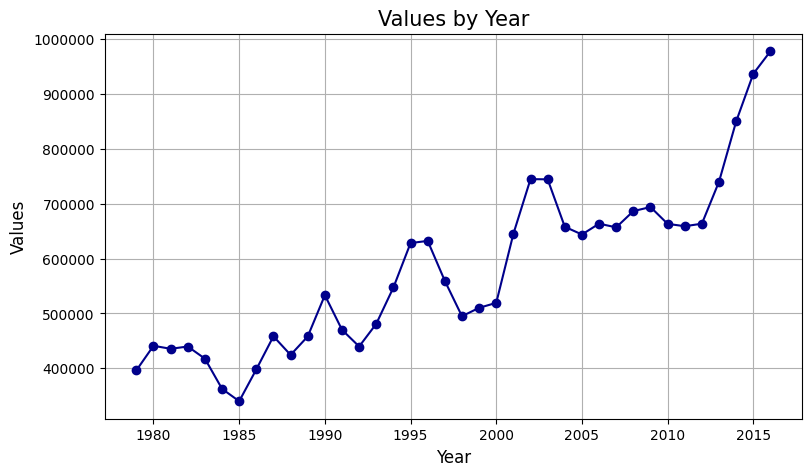

In [31]:
 # Visualize number of migrations by year in a line graph.
 grouped = data.groupby(['Year']).aggregate({'Value' : 
'sum'}).reset_index()
 grouped = grouped.astype(int)
 plt.figure(figsize=(9,5))
 plt.plot(grouped['Year'], grouped['Value'], color='darkblue',  
marker='o')
 plt.ticklabel_format(style='plain')
 plt.xlabel('Year', fontsize=12)
 plt.ylabel('Values', fontsize=12)
 plt.title('Values by Year', fontsize=15)
 plt.grid()
 plt.show()

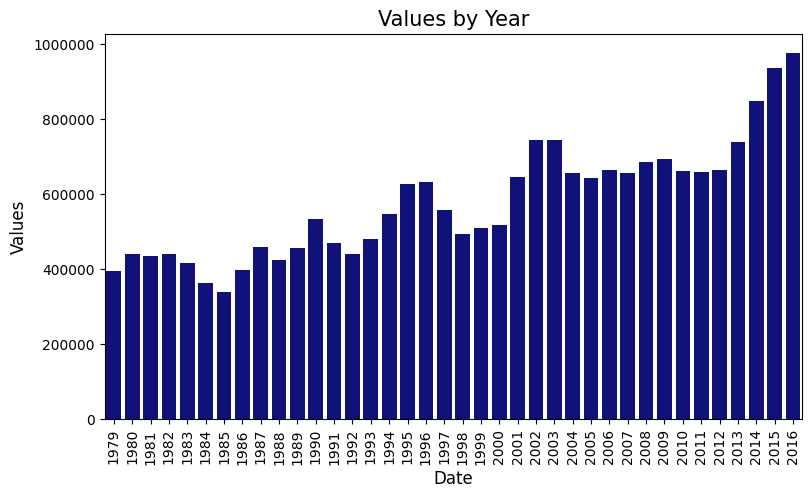

In [32]:
plt.figure(figsize=(9, 5))
plt.ticklabel_format(style='plain')

# Corrected barplot function syntax
ax = sns.barplot(x=grouped['Year'], y=grouped['Value'], color='darkblue')

# Rotate the x-axis labels using plt.xticks()
plt.xticks(rotation=90, size=10)

# Set labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Values by Year', fontsize=15)

plt.show()

#### Part for giving input to the code

The following function takes input for the GUI in the order of
1. Measure
2. Country
3. Citizenship
4. Year

In [33]:
# GUI Function for Prediction
def predict_migration():
    try:
        # Collecting user input
        measure = int(measure_entry.get())
        country = country_entry.get()
        citizenship = int(citizenship_entry.get())
        year = int(year_entry.get())
        
        # Encoding country
        country_encoded = pd.factorize(data['Country'])[0][data['Country'] == country].values[0] if country in data['Country'].values else 0
        
        # Preparing input data for prediction
        input_data = pd.DataFrame([[country_encoded, measure, year, citizenship]], columns=['Country', 'Measure', 'Year', 'Citizenship'])
        
        # Prediction and display with smooth color transition
        prediction = model_rf.predict(input_data)
        result_text = f"Predicted number of migrants: {prediction[0]:.2f}"
        display_prediction(result_text)
    except Exception as e:
        messagebox.showerror("Error", f"Error in prediction: {str(e)}")

####
Calling the function and showing the prediction for the provided input
using Tkinter GUI

In [34]:
def display_prediction(text, delay=50, color_value=0):
    if color_value <= 200:  # Slowly change color to a brighter shade
        color = f"#{color_value:02x}{color_value:02x}ff"
        result_label.config(text=text, fg=color)
        root.after(delay, display_prediction, text, delay, color_value + 5)
    else:  # Hold the color at bright blue
        result_label.config(text=text, fg="#0000ff")

####
#### GUI Setup

In [35]:
# GUI Design Setup
root = tk.Tk()
root.title("Migration Prediction")
root.geometry("550x450")
root.configure(bg="#f0f5f9")

# Custom Fonts
title_font = font.Font(family="Helvetica", size=18, weight="bold")
label_font = font.Font(family="Helvetica", size=12)
entry_font = font.Font(family="Helvetica", size=10)

# Title
title_label = tk.Label(root, text="Migration Prediction Tool", font=title_font, bg="#f0f5f9", fg="#003366")
title_label.grid(row=0, column=0, columnspan=2, pady=20)

# Labels and Entry Widgets with Centered Grid Layout
tk.Label(root, text="Measure (0: Arrivals, 1: Departures, 2: Net):", font=label_font, bg="#f0f5f9", fg="#003366").grid(row=1, column=0, padx=10, pady=10, sticky="e")
measure_entry = tk.Entry(root, font=entry_font, width=30, bg="#ffffff", fg="#333333", relief="solid", borderwidth=1)
measure_entry.grid(row=1, column=1, padx=10, pady=10)

tk.Label(root, text="Country (e.g., Australia):", font=label_font, bg="#f0f5f9", fg="#003366").grid(row=2, column=0, padx=10, pady=10, sticky="e")
country_entry = tk.Entry(root, font=entry_font, width=30, bg="#ffffff", fg="#333333", relief="solid", borderwidth=1)
country_entry.grid(row=2, column=1, padx=10, pady=10)

tk.Label(root, text="Citizenship (0: NZ, 1: AUS, 2: All):", font=label_font, bg="#f0f5f9", fg="#003366").grid(row=3, column=0, padx=10, pady=10, sticky="e")
citizenship_entry = tk.Entry(root, font=entry_font, width=30, bg="#ffffff", fg="#333333", relief="solid", borderwidth=1)
citizenship_entry.grid(row=3, column=1, padx=10, pady=10)

tk.Label(root, text="Year (e.g., 2020):", font=label_font, bg="#f0f5f9", fg="#003366").grid(row=4, column=0, padx=10, pady=10, sticky="e")
year_entry = tk.Entry(root, font=entry_font, width=30, bg="#ffffff", fg="#333333", relief="solid", borderwidth=1)
year_entry.grid(row=4, column=1, padx=10, pady=10)

# Predict Button with Hover Effect
def on_enter(e):
    predict_button.config(bg="#004080", fg="white")

def on_leave(e):
    predict_button.config(bg="#0059b3", fg="white")

predict_button = tk.Button(root, text="Predict Migration", font=label_font, bg="#0059b3", fg="white", command=predict_migration, relief="solid", borderwidth=1)
predict_button.grid(row=5, column=0, columnspan=2, pady=20)
predict_button.bind("<Enter>", on_enter)
predict_button.bind("<Leave>", on_leave)

# Result Display
result_label = tk.Label(root, text="", font=label_font, bg="#f0f5f9")
result_label.grid(row=6, column=0, columnspan=2, pady=10)

####
#### Running the Application

In [36]:
# Run the application
root.mainloop()

###
### Conclusion

The Random Forest Regressor model achieved a 74% accuracy rate in predicting migration patterns between countries. Overall, the data indicates a gradual increase in migration over time, which is consistent with findings reported by the World Economic Forum. Enhancing the model's accuracy may be possible by expanding the dataset with additional features and optimizing hyperparameters for better perfomance.

####
####
####
####
####
####
####
####
####
####
####
The GUI allows users to input various details and receive a prediction for the estimated number of migrants.
The test run below demonstrates the predicted number of Australian citizens leaving New Zealand for India in 2025.

####
####
####
####
##### Vadisetti Pranay Satvik Reddy
##### 2201221